### DUE: by 11:59pm on February 1, 2022

For this project, you will explore a COVID related dataset. The dataset is provided by Centers for Disease Control and Prevention 
(CDC) and updated weekly. When you submit your work on the due date, the dataset may have been updated already. Please don't worry. Your work will be graded based on the version of the dataset you use.

FIRST, explore download options for the dataset on this link:

https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm


### Part 1 [10 points]

Download the data. Then provide some statistical summaries of the data. For example: number of samples, attributes, column names, if missing values are present, quartiles etc.

Note: This part is open ended. Please show at least five different types of summaries.

In [375]:
#import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('./data.csv')
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1123.0,1172.0,NaN
1,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,4795.0,4958.0,NaN
2,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,12741.0,13234.0,NaN
3,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,31736.0,32891.0,NaN
4,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,68208.0,70495.0,NaN


Due to the dataset source disclaiming that deaths could be duplicated within condition groups and between different condition groups because multiple conditions could have been associated with the death, I tried to avoid this as much as I could because we have no way of knowing which deaths would have been duplicated. The COVID-19 condition accounts for all COVID-19 deaths.

Furthermore the dataset includes deaths by month, year, and by total (over all dates in the dataset) so adding these would not be correct

The 'state' value 'United States' includes deaths for all states including NYC and DC, per the dataset source

The 'all ages' age group includes deaths for each age group (including not stated) for a given condition, grouping, state, etc. I believe this also includes the deaths between 1 and 9 which were omitted from individual age groups because the sums do not always match, i.e. those ommitted deaths may/seem to be be contributing to the death totals for 'all ages'

In [376]:
#Summaries
# 1, 2
#In the dataset as-is
print("There are", len(df.columns), "columns in the dataset:", list(df.columns), "\n")

print("There are", len(df), "samples in the dataset. \n")
print("The shape of the dataset is:", df.shape)

There are 14 columns in the dataset: ['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month', 'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths', 'Number of Mentions', 'Flag'] 

There are 360180 samples in the dataset. 

The shape of the dataset is: (360180, 14)


In [377]:
#3

#Data types and non-null counts of each column
df.info()

#Note: the missing values here seem mostly deliberate.
#missing values for month and year are deliberate when 'group' is 'by total' because month and year are not specified in that case.
#missing values for covid-19 deaths are those that were suppressed because they were between 1 and 9.
#missing values for Flag are those deaths that were not suppressed.
#number of mentions supposedly refers to number of conditions associated with the deaths for the particular age group for a given row,
#  so it makes sense this would be mostly missing values corresponding to missing death values, but not always.

print("\nThe following table shows how many missing values each column contains.")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360180 entries, 0 to 360179
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          360180 non-null  object 
 1   Start Date          360180 non-null  object 
 2   End Date            360180 non-null  object 
 3   Group               360180 non-null  object 
 4   Year                347760 non-null  float64
 5   Month               310500 non-null  float64
 6   State               360180 non-null  object 
 7   Condition Group     360180 non-null  object 
 8   Condition           360180 non-null  object 
 9   ICD10_codes         360180 non-null  object 
 10  Age Group           360180 non-null  object 
 11  COVID-19 Deaths     257896 non-null  float64
 12  Number of Mentions  260851 non-null  float64
 13  Flag                102284 non-null  object 
dtypes: float64(4), object(10)
memory usage: 38.5+ MB

The following table shows how many

In [378]:
#4 Number of unique condition groups and unique conditions within each condition group

cond = df.groupby('Condition Group').agg({'Condition': [pd.Series.nunique, pd.unique]})
cond.columns = cond.columns.get_level_values(1)
cond = cond.rename(columns = {'nunique': 'Number of conditions in group', 'unique': 'Conditions in this group'})
print("The number of unique condition groups represented in the dataset is:", len(cond))
cond

The number of unique condition groups represented in the dataset is: 12


,Number of conditions in group,Conditions in this group
Condition Group,,
All other conditions and causes (residual),1,All other conditions and causes (residual)
Alzheimer disease,1,Alzheimer disease
COVID-19,1,COVID-19
Circulatory diseases,7,"[Hypertensive diseases, Ischemic heart disease, Cardiac arrest, Cardiac arrhythmia, Heart failure, Cerebrovascular diseases, Other diseases of the circulatory system]"
Diabetes,1,Diabetes
"Intentional and unintentional injury, poisoning, and other adverse events",1,"Intentional and unintentional injury, poisoning, and other adverse events"
Malignant neoplasms,1,Malignant neoplasms
Obesity,1,Obesity
Renal failure,1,Renal failure


count       53.000000
mean     16211.150943
std      17921.463064
min        451.000000
25%       4240.000000
50%      11266.000000
75%      21877.000000
max      82236.000000
Name: COVID-19 Deaths, dtype: float64


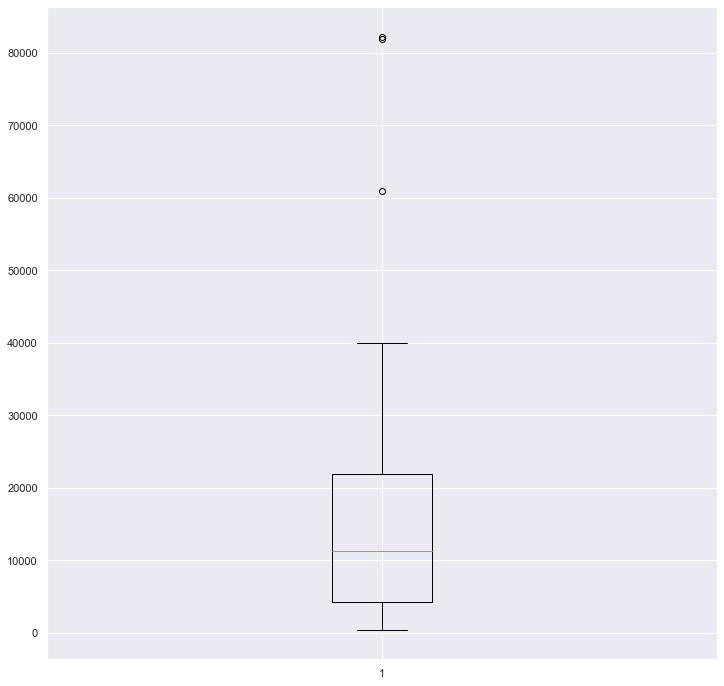

In [379]:
#5 
#To avoid duplicating deaths as much as possible, here I considered deaths where condition = COVID-19, i.e. all covid_19 related deaths
#I used 'all ages' as the age group because it seems to include some of the deaths we may not have accounted for otherwise by summing each age group

#This shows a statisitical summary of the covid-19 deaths for each state over all age groups over the entire time period of the data set.
df_covid_only = df[(df['Condition'] == 'COVID-19') & (df['Group'] == 'By Total') & (df['Age Group'] == 'All Ages') & (df['State'] != 'United States')]
print(df_covid_only['COVID-19 Deaths'].describe())

plt.boxplot(df_covid_only['COVID-19 Deaths'])
plt.show()



### Part 2 [30 points]

Perform exploratory analysis on the data. Research online for ideas, and then show analysis on at least five different aspects of the dataset. 

Note: This part is open-ended. Any valid analysis is fine. Use visualizations when necessary.

In [380]:
#1

#Here I show some examples of the 'all ages' category matching/not matching the sum of the other age groups:

#United States had no deaths omitted here
match = df[(df["State"] == "United States") & (df['Group'] == 'By Total') & (df['Condition'] == 'Influenza and pneumonia')]
all_ages_deaths = match.iloc[9, 11]
sum = match['COVID-19 Deaths'].sum() - all_ages_deaths
print(all_ages_deaths == sum)

#Arizona had no deaths omitted here
match2 = df[(df["State"] == "Arizona") & (df['Group'] == 'By Total') & (df['Condition'] == 'Cardiac arrest')]
all_ages_deaths = match2.iloc[9, 11]
sum = match2['COVID-19 Deaths'].sum() - all_ages_deaths
print(all_ages_deaths == sum)

#Connecticut had some deaths omitted here for one age group
no_match = df[(df["State"] == "Connecticut") & (df['Group'] == 'By Total') & (df['Condition'] == 'Influenza and pneumonia')]
all_ages_deaths = no_match.iloc[9, 11]
sum = no_match['COVID-19 Deaths'].sum() - all_ages_deaths
print(all_ages_deaths == sum)

#North Dakota had some deaths omitted here for two age groups
no_match2 = df[(df["State"] == "North Dakota") & (df['Group'] == 'By Total') & (df['Condition'] == 'Influenza and pneumonia')]
all_ages_deaths = no_match2.iloc[9, 11]
sum = no_match2['COVID-19 Deaths'].sum() - all_ages_deaths
print(all_ages_deaths == sum)

True
True
False
False


In [381]:
#2
#Covid-19 deaths by condition:
df_by_condition = df[(df['Condition'] != 'COVID-19') & (df['Group'] == 'By Total') & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States')]
df_by_condition = df_by_condition.pivot_table(values = 'COVID-19 Deaths', index = 'Condition', aggfunc = 'sum')
print("The condition contributing to most COVID-19 deaths of all time is:", df_by_condition.index[df_by_condition['COVID-19 Deaths'] == df_by_condition['COVID-19 Deaths'].max()][0])
print("The condition contributing to least COVID-19 deaths of all time is:", df_by_condition.index[df_by_condition['COVID-19 Deaths'] == df_by_condition['COVID-19 Deaths'].min()][0],'\n')
print(df_by_condition.describe())
print(df_by_condition)

The condition contributing to most COVID-19 deaths of all time is: Influenza and pneumonia
The condition contributing to least COVID-19 deaths of all time is: Respiratory arrest 

       COVID-19 Deaths
count        22.000000
mean     108907.409091
std      110880.443120
min       17578.000000
25%       41813.750000
50%       70687.500000
75%       99204.500000
max      420135.000000
                                                                           COVID-19 Deaths
Condition                                                                                 
Adult respiratory distress syndrome                                                91979.0
All other conditions and causes (residual)                                        339128.0
Alzheimer disease                                                                  25060.0
Cardiac arrest                                                                    101613.0
Cardiac arrhythmia                                                 

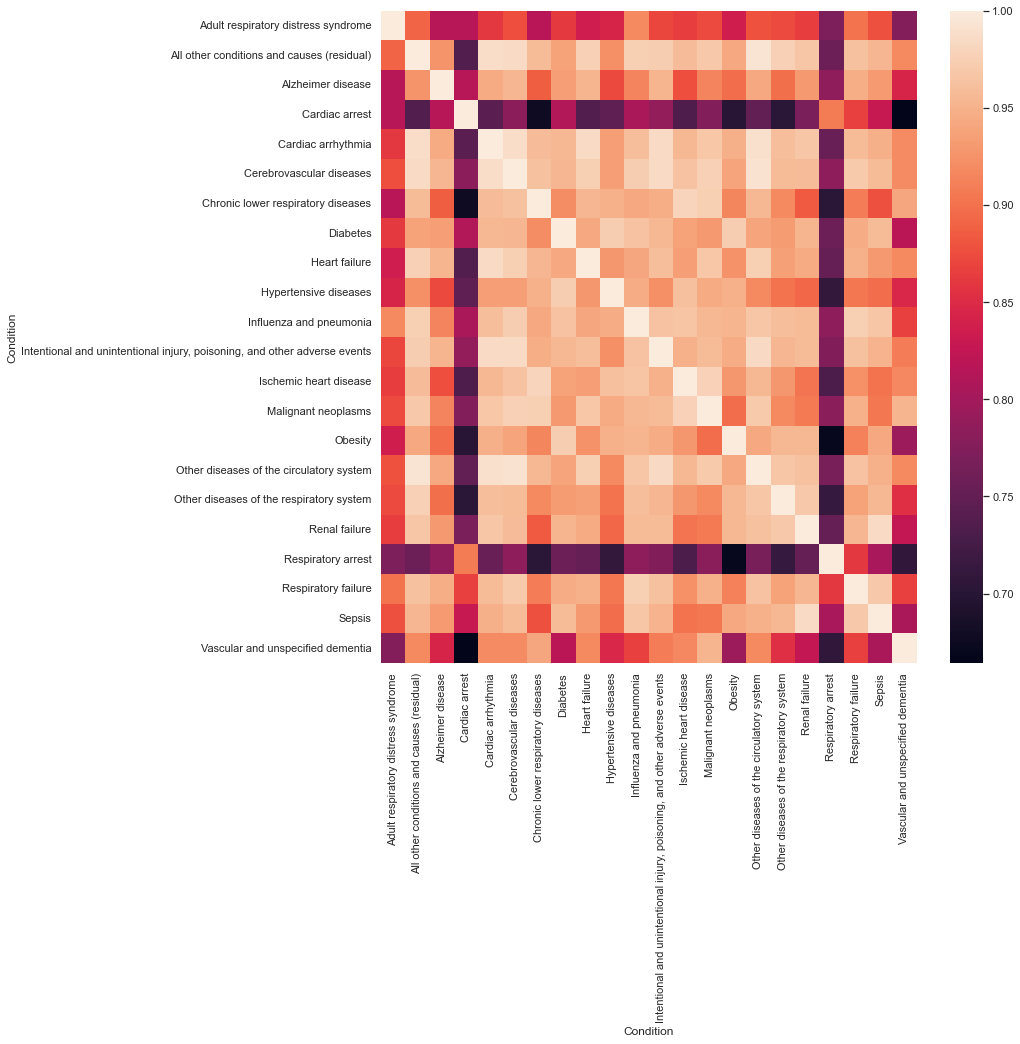

Condition                                   Condition                                 
Other diseases of the circulatory system    All other conditions and causes (residual)    0.992237
All other conditions and causes (residual)  Other diseases of the circulatory system      0.992237
Cerebrovascular diseases                    Other diseases of the circulatory system      0.991573
Other diseases of the circulatory system    Cerebrovascular diseases                      0.991573
Cardiac arrhythmia                          Other diseases of the circulatory system      0.990285
Other diseases of the circulatory system    Cardiac arrhythmia                            0.990285
Cardiac arrhythmia                          All other conditions and causes (residual)    0.987850
All other conditions and causes (residual)  Cardiac arrhythmia                            0.987850
Cardiac arrhythmia                          Cerebrovascular diseases                      0.987383
Cerebrovascular diseas

In [382]:
#3
#Correlation between conditions
df_cond_cor = df[(df['Condition'] != 'COVID-19') & (df['Group'] == 'By Total') & (df['Age Group'] == 'All Ages') & (df['State'] != 'United States')]
df_cond_cor = df_cond_cor.pivot_table(values = 'COVID-19 Deaths', columns = 'Condition', index = 'State', aggfunc = 'sum')

corr_mat = df_cond_cor.corr()

#Here I change correlations of conditions with themselves, i.e. correlation = 1, to 0 so I can see what two distince conditions had the highest correlation
corr_mat = corr_mat.replace(1.0,0.0)
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(ascending = False)

sns.heatmap(df_cond_cor.corr())
plt.show()

#The highest correlated conditions for deaths
print(corr_mat.head(10))

In [383]:
#4
#To avoid duplicating deaths, for the following analyses I considered deaths where condition = COVID-19.
#Covid-19 deaths by state:

df_by_state = df[(df['Condition'] == 'COVID-19') & (df['Group'] == 'By Total') & (df['State'] != 'United States')]
df_by_state = df_by_state.pivot_table(values = 'COVID-19 Deaths', index = 'State', columns = 'Age Group', aggfunc = 'sum')

print("The state with the highest COVID-19 deaths of all time is:", df_covid_only.loc[df_covid_only['COVID-19 Deaths'] == df_covid_only['COVID-19 Deaths'].max(), 'State'].iloc[0])
print("The state with the lowest COVID-19 deaths of all time is:", df_covid_only.loc[df_covid_only['COVID-19 Deaths'] == df_covid_only['COVID-19 Deaths'].min(), 'State'].iloc[0])

#Which state had highest number of Covid-19 deaths among the youngest and oldest?
df_covid_only_young = df[(df['Condition'] == 'COVID-19') & (df['Group'] == 'By Total') & (df['Age Group'] == '0-24') & (df['State'] != 'United States')]
df_covid_only_old = df[(df['Condition'] == 'COVID-19') & (df['Group'] == 'By Total') & (df['Age Group'] == '85+') & (df['State'] != 'United States')]

print("The state with the highest COVID-19 deaths of all time among the youngest demographic is:", df_covid_only_young.loc[df_covid_only_young['COVID-19 Deaths'] == df_covid_only_young['COVID-19 Deaths'].max(), 'State'].iloc[0])
print("The state with the highest COVID-19 deaths of all time among the oldest demographic is:", df_covid_only_old.loc[df_covid_only_old['COVID-19 Deaths'] == df_covid_only_old['COVID-19 Deaths'].max(), 'State'].iloc[0])

df_by_state.head()

The state with the highest COVID-19 deaths of all time is: Texas
The state with the lowest COVID-19 deaths of all time is: Vermont
The state with the highest COVID-19 deaths of all time among the youngest demographic is: Texas
The state with the highest COVID-19 deaths of all time among the oldest demographic is: California


Age Group,0-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,All Ages,Not stated
State,,,,,,,,,,
Alabama,43.0,211.0,576.0,1361.0,2828.0,4240.0,4198.0,3071.0,16528.0,0.0
Alaska,0.0,28.0,52.0,103.0,191.0,275.0,235.0,159.0,1048.0,0.0
Arizona,119.0,398.0,844.0,1887.0,3831.0,5790.0,6301.0,4614.0,23784.0,0.0
Arkansas,24.0,121.0,293.0,633.0,1469.0,2255.0,2520.0,2197.0,9512.0,0.0
California,286.0,1141.0,2804.0,6674.0,13819.0,18504.0,19138.0,19519.0,81887.0,0.0


C:\Users\tvroy\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


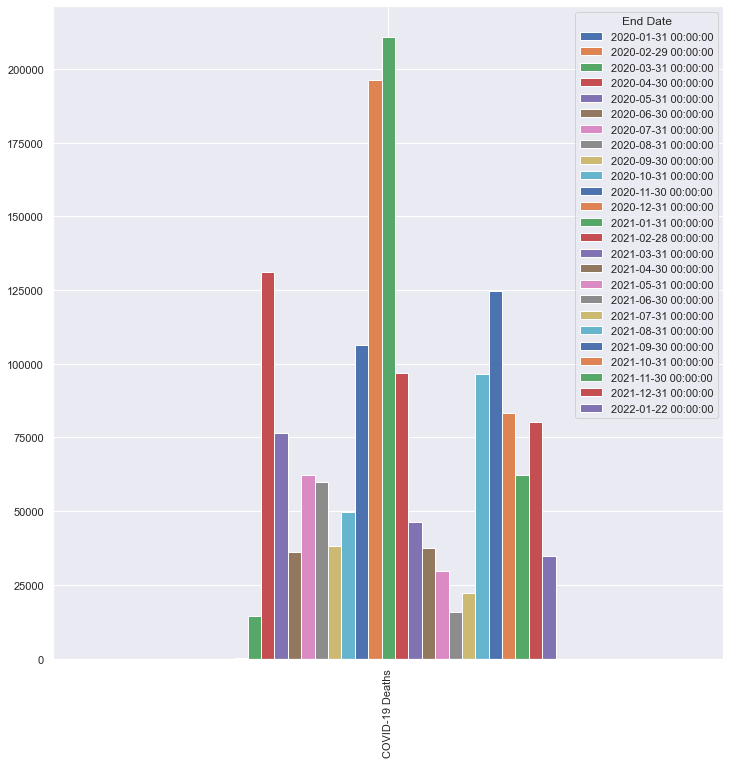

End Date,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-22
COVID-19 Deaths,10.0,38.0,14320.0,130954.0,76602.0,36010.0,62226.0,59768.0,38276.0,49806.0,...,37404.0,29798.0,15908.0,22280.0,96586.0,124788.0,83336.0,62308.0,80080.0,34890.0


In [407]:
#5
#To avoid duplicating deaths, for the following analyses I considered deaths where condition = COVID-19:
#Covid-19 deaths over time

df_over_time = df[(df['Condition'] == 'COVID-19') & (df['Group'] == 'By Month') & (df['State'] == 'United States')]
#To order the dates chronologically
df_over_time.loc[:,'End Date'] = pd.to_datetime(df_over_time.loc[:,'End Date'])

#I had to ignore the setting with copy warning, but it was okay for my purposes here.

df_over_time = df_over_time.pivot_table(values = 'COVID-19 Deaths', columns = 'End Date', aggfunc = 'sum')
df_over_time.plot.bar()
plt.show()
df_over_time


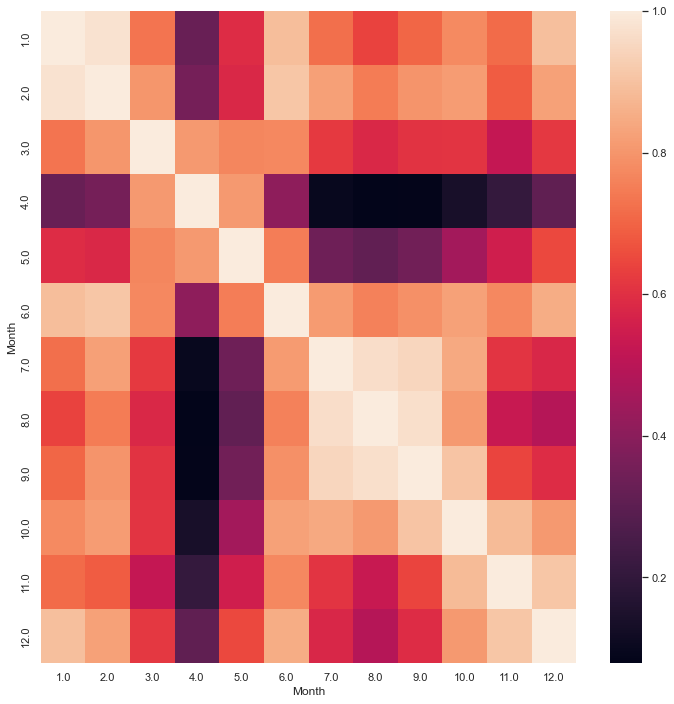

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
State,,,,,,,,,,,,
Alabama,5201.0,1926.0,839.0,1090.0,1266.0,1038.0,2263.0,5261.0,5056.0,2768.0,2097.0,4051.0
Alaska,61.0,18.0,16.0,17.0,42.0,0.0,37.0,218.0,366.0,476.0,295.0,237.0
Arizona,9229.0,3308.0,1138.0,1248.0,1462.0,2144.0,4782.0,3458.0,2915.0,2732.0,4864.0,10130.0
Arkansas,2759.0,949.0,411.0,265.0,313.0,573.0,1370.0,2735.0,2336.0,2061.0,2133.0,2933.0
California,41605.0,15408.0,5220.0,6021.0,5846.0,4995.0,9374.0,14235.0,12553.0,8350.0,9784.0,30324.0


In [409]:
#6
#To avoid duplicating deaths, for the following analyses I considered deaths where condition = COVID-19:
#Covid-19 deaths by month across each state
df_by_month2 = df[(df['Condition'] == 'COVID-19') & (df['Group'] == 'By Month') & (df['State'] != 'United States')]
df_by_month2 = df_by_month2.pivot_table(values = 'COVID-19 Deaths', index = 'State', columns = 'Month', aggfunc = 'sum')

#Are months within seasons more highly correlated than other months?

sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(df_by_month2.corr())
plt.show()
df_by_month2.head()
#Note: summer months are more highly correlated, maybe implying more people want to go out and be around friends in the nice weather.


### Part 3 [15 + 20 + 10 = 45 points]

Observe the "condition groups" column and pick one condition group. Combine all the death related data for that condition group for only the New England states. You can remove the conflicting attributes at this point, but make sure to still retain the age-group information.

a. Perform at least three types of analysis on this data subset. 

b. Perform similar analysis for the rest of the US states.

c. Provide a written summary contrasting your findings from a and b. (minimum 50 words)


Note1: In case you were curious which are the New England states, check this link: https://en.wikipedia.org/wiki/New_England

Note2: Use visualizations when necessary.


In [410]:
ne_states = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"]
df_ne = df[df['State'].isin(ne_states)]
df_ne.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
1610,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
1611,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,15.0,15.0,NaN
1612,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,38.0,40.0,NaN
1613,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,119.0,125.0,NaN
1614,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,347.0,359.0,NaN


In [387]:
df_other_states = df[~df['State'].isin(ne_states)]
#I eliminated United States from 'State' as well because per the dataset source, "united states" contained data for all the states
#I did keep NYC, DC, and Puerto Rico, note NYC was not included in totals for NY State per dataset source
df_other_states = df_other_states[df_other_states['State'] != "United States"]
df_other_states.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,14.0,14.0,NaN
231,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,92.0,97.0,NaN
232,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,207.0,213.0,NaN
233,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,471.0,484.0,NaN
234,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,986.0,1012.0,NaN


In [388]:
#For condition group, I chose renal failure because:
#if a death was attributed to more than one condition in a single condition group, it would have been double counted within the condition group. 
#The condition group renal failure had only one condition: renal failure, so I thought I could best avoid that issue here.

df_ne_rf = df_ne[df_ne['Condition Group'] == "Renal failure"]
df_ne_rf.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
1800,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Renal failure,Renal failure,N17-N19,0-24,NaN,NaN,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
1801,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Renal failure,Renal failure,N17-N19,25-34,NaN,NaN,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
1802,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Renal failure,Renal failure,N17-N19,35-44,NaN,10.0,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
1803,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Renal failure,Renal failure,N17-N19,45-54,47.0,49.0,NaN
1804,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Connecticut,Renal failure,Renal failure,N17-N19,55-64,109.0,109.0,NaN


In [389]:
df_other_rf = df_other_states[df_other_states['Condition Group'] == "Renal failure"]
df_other_rf.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
420,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Renal failure,Renal failure,N17-N19,0-24,NaN,NaN,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
421,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Renal failure,Renal failure,N17-N19,25-34,15.0,15.0,NaN
422,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Renal failure,Renal failure,N17-N19,35-44,73.0,73.0,NaN
423,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Renal failure,Renal failure,N17-N19,45-54,148.0,151.0,NaN
424,01/23/2022,01/01/2020,01/22/2022,By Total,NaN,NaN,Alabama,Renal failure,Renal failure,N17-N19,55-64,322.0,331.0,NaN


In [390]:
#part a
#1 Deaths by age group

ne_rf_age = df_ne_rf.pivot_table(values = 'COVID-19 Deaths', columns = 'Age Group', index = 'State', aggfunc = 'sum')
ne_rf_age

Age Group,0-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,All Ages,Not stated
State,,,,,,,,,,
Connecticut,0.0,0.0,0.0,92.0,271.0,411.0,561.0,600.0,2211.0,0.0
Maine,0.0,0.0,0.0,22.0,40.0,57.0,109.0,67.0,429.0,0.0
Massachusetts,0.0,0.0,15.0,139.0,572.0,1162.0,1340.0,1702.0,5210.0,0.0
New Hampshire,0.0,0.0,0.0,0.0,51.0,125.0,131.0,159.0,630.0,0.0
Rhode Island,0.0,0.0,0.0,0.0,78.0,167.0,217.0,318.0,942.0,0.0
Vermont,0.0,0.0,0.0,0.0,0.0,0.0,10.0,23.0,68.0,0.0


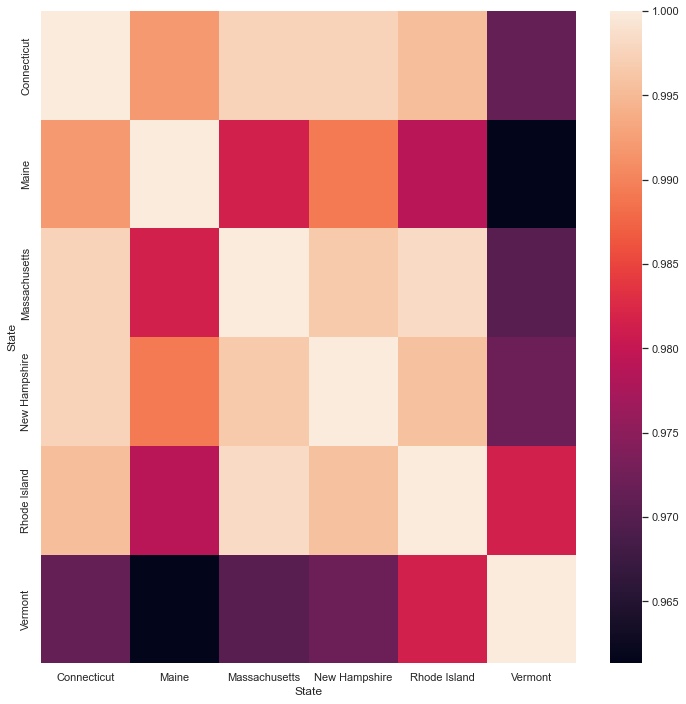

In [391]:
#2
#Are new england covid-19 deaths highly correlated due to proximity and ease of travel across state lines?

df_ne_corr = df_ne_rf.pivot_table(values = 'COVID-19 Deaths', columns = 'State', index = 'Age Group', aggfunc = 'sum')

sns.heatmap(df_ne_corr.corr())
plt.show()

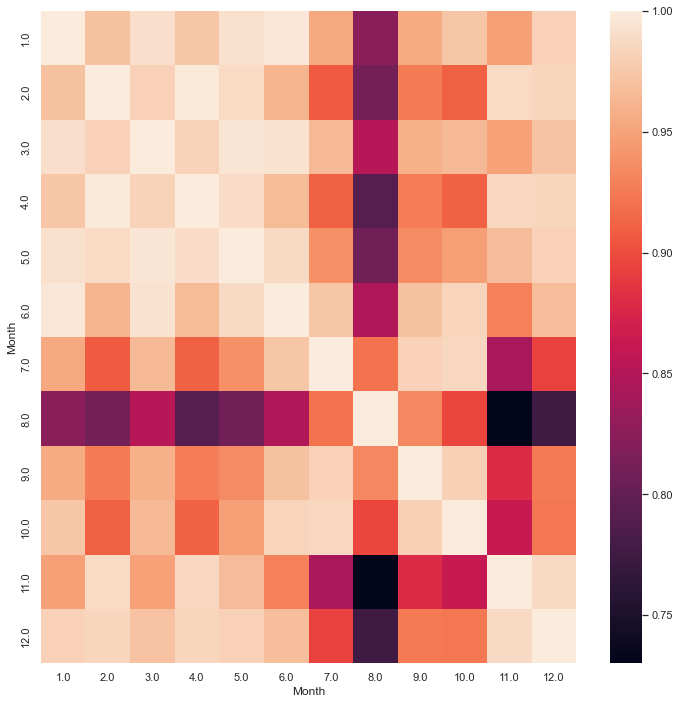

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
State,,,,,,,,,,,,
Connecticut,178.0,79.0,31.0,315.0,207.0,24.0,0.0,0.0,14.0,14.0,103.0,233.0
Maine,19.0,13.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,10.0,18.0,51.0
Massachusetts,572.0,177.0,118.0,732.0,598.0,103.0,46.0,25.0,88.0,107.0,171.0,472.0
New Hampshire,80.0,0.0,0.0,0.0,14.0,11.0,0.0,0.0,12.0,19.0,17.0,90.0
Rhode Island,108.0,18.0,12.0,40.0,99.0,13.0,0.0,0.0,0.0,17.0,28.0,93.0
Vermont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
#3 Deaths per month
#Are months within seasons more highly correlated than other months for New England because we experience more notable seasonal differences than other states?
ne_rf_by_month = df_ne_rf.pivot_table(values = 'COVID-19 Deaths', index = 'State', columns = 'Month', aggfunc = 'sum')

sns.heatmap(ne_rf_by_month.corr())
plt.show()

ne_rf_by_month

In [393]:
#part b
#1
other_rf_age = df_other_rf.pivot_table(values = 'COVID-19 Deaths', columns = 'Age Group', index = 'State', aggfunc = 'sum')
other_rf_age


Age Group,0-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,All Ages,Not stated
State,,,,,,,,,,
Alabama,0.0,25.0,177.0,367.0,897.0,1482.0,1272.0,647.0,5206.0,0.0
Alaska,0.0,0.0,0.0,10.0,29.0,55.0,47.0,35.0,290.0,0.0
Arizona,0.0,50.0,157.0,526.0,1113.0,1751.0,1619.0,859.0,6420.0,0.0
Arkansas,0.0,25.0,76.0,175.0,339.0,726.0,656.0,391.0,2716.0,0.0
California,46.0,390.0,1056.0,3079.0,6417.0,8313.0,7544.0,5477.0,32538.0,0.0
Colorado,0.0,25.0,66.0,316.0,634.0,1083.0,862.0,927.0,4347.0,0.0
Delaware,0.0,0.0,0.0,36.0,85.0,149.0,191.0,133.0,806.0,0.0
District of Columbia,0.0,0.0,0.0,24.0,29.0,74.0,29.0,29.0,274.0,0.0
Florida,28.0,152.0,524.0,1288.0,2855.0,4102.0,4084.0,2984.0,16212.0,0.0


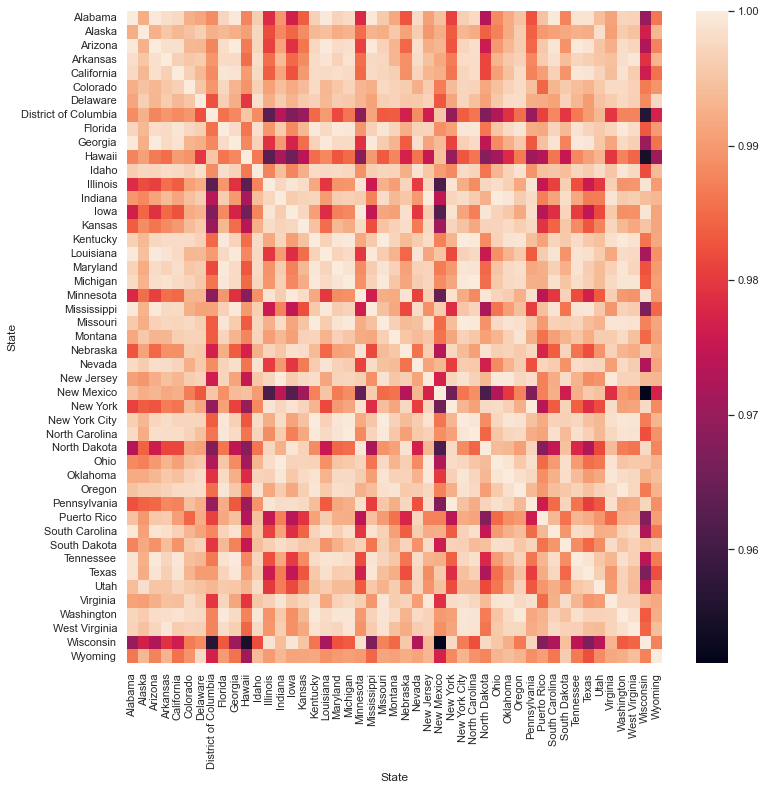

In [394]:
#2 #Are other states covid-19 deaths highly correlated?
df_other_corr = df_other_rf.pivot_table(values = 'COVID-19 Deaths', columns = 'State', index = 'Age Group', aggfunc = 'sum')

sns.heatmap(df_other_corr.corr())
plt.show()

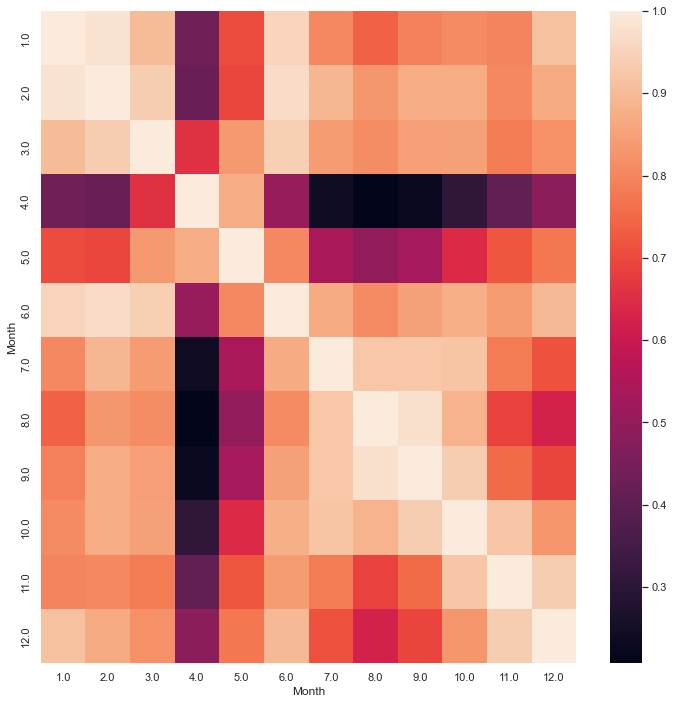

In [395]:
#3
other_rf_by_month = df_other_rf.pivot_table(values = 'COVID-19 Deaths', index = 'State', columns = 'Month', aggfunc = 'sum')

sns.heatmap(other_rf_by_month.corr())
plt.show()

### Part 4 [15 points]

For your chosen condition group, what is the median age for COVID-19 related deaths for the New England states?


Note: Part 4 asks you to give a number, not a range of numbers.


In [396]:
#by total gives deaths for the entire timeframe of the dataset rather than by year or month
df_ne_rf_med_age = df_ne_rf[df_ne_rf['Group'] == "By Total"]
rf_covid_deaths_per_age = df_ne_rf_med_age.pivot_table(values = 'COVID-19 Deaths', index = 'Age Group', aggfunc = 'sum')

#note: 'all ages' should be the sum of all the age ranges (including not stated), but some of the deaths were suppressed if they were between 1 and 9 so it does not match. 
#I eliminated not stated because it is 0 here.
rf_covid_deaths_per_age = rf_covid_deaths_per_age.drop(labels = {'All Ages','Not stated'}, axis = 0)
rf_covid_deaths_per_age


,COVID-19 Deaths
Age Group,
0-24,0.0
25-34,0.0
35-44,15.0
45-54,123.0
55-64,415.0
65-74,715.0
75-84,870.0
85+,1039.0


In [397]:
cumulative_freq = [rf_covid_deaths_per_age.iloc[0,0]]
for v in range(1, len(rf_covid_deaths_per_age)):
    cumulative_freq.append(cumulative_freq[v-1] + rf_covid_deaths_per_age.iloc[v,0])
rf_covid_deaths_per_age['Cumulative Frequency'] = cumulative_freq
rf_covid_deaths_per_age

,COVID-19 Deaths,Cumulative Frequency
Age Group,,
0-24,0.0,0.0
25-34,0.0,0.0
35-44,15.0,15.0
45-54,123.0,138.0
55-64,415.0,553.0
65-74,715.0,1268.0
75-84,870.0,2138.0
85+,1039.0,3177.0


In [398]:
#I am using the sum of deaths across the age groups that were listed rather than the 'all ages' total since the 'all ages' total included omitted deaths for some age ranges
N = rf_covid_deaths_per_age.iloc[7,1]
print("N:", N)

#To find median interval, we need to see which interval N/2 falls into
print("N/2:", N/2, "falls into the 75-84 interval")

#Lower boundary of median interval
L = 75
print("L:", L)

#frequency of the median interval
freq_med = rf_covid_deaths_per_age.iloc[6,0]
print("frequency of the median interval:", freq_med)

#cumulative frequency of intervals below the median interval
sum_freq = rf_covid_deaths_per_age.iloc[5,1]
print("sum of frequencies of intervals lower than the median interval:", sum_freq)
w = 10
print("the width of the median interval:", w, "\n")

med_age = L + ((((N/2)-sum_freq)/freq_med)*w)
print("The median age for COVID-19 deaths related to renal failure in New England is:", med_age)

N: 3177.0
N/2: 1588.5 falls into the 75-84 interval
L: 75
frequency of the median interval: 870.0
sum of frequencies of intervals lower than the median interval: 1268.0
the width of the median interval: 10 

The median age for COVID-19 deaths related to renal failure in New England is: 78.683908045977


### Deliverables:

Put both the datasets and your Jupyter Notebook in a folder, zip it, and submit the zipped file on Canvas. Make sure the zipped file has the following name:

yourLastName_yourFirstName.zip